<h1><b><u><center>FraudNet: Detecting Online Transaction Fraud</center></u></b></h1>

In an increasingly digital world, online transactions have become ubiquitous, facilitating commerce, banking, and financial interactions on a global scale. However, with the rise of online transactions comes the challenge of fraudulent activities, posing risks to businesses, financial institutions, and consumers alike. Detecting and preventing fraud in online transactions is paramount to maintaining trust and security in digital financial ecosystems.

This project aims to address the issue of online transaction fraud by leveraging machine learning techniques to develop a predictive model. By analyzing transactional data and identifying patterns indicative of fraudulent behavior, the model seeks to proactively identify and flag suspicious transactions in real-time. Through the implementation of advanced algorithms and feature engineering, this project endeavors to enhance fraud detection capabilities and safeguard the integrity of online financial transactions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('C:/Users/User/Desktop/DATA/ML_Projects/datasets/Payment_fraud_det.csv')

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
cols=['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']

In [10]:
for i in cols:
    uni=df[i].unique()
    print(f"Feature: {i}\nValues: \n{uni}\n\n")

Feature: step
Values: 
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
numcols=['step','amount','oldbalanceOrg','oldbalanceDest','newbalanceDest','isFlaggedFraud']

In [13]:
cols

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [14]:
catcols=['type','nameOrig','nameDest']

In [15]:
type=df['type'].value_counts()
type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

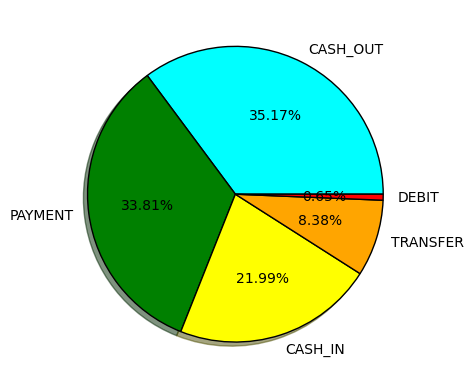

In [16]:
color=['aqua','green','yellow','orange','red']
lbls=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT']
wedgeprops={'edgecolor':'k','linewidth':1}
plt.pie(x=type,autopct='%1.2f%%',shadow=True,colors=color,labels=lbls,wedgeprops=wedgeprops)
plt.show()

- It is found that Most of the transaction is made using CASH_OUT type of transaction include ATM withdrawals, cashback transactions, or transferring funds to another party outside the system.
- secondly the data contains of individuals done transaction using PAYMENT type which represents transactions where funds are transferred to pay for goods or services.

<Axes: >

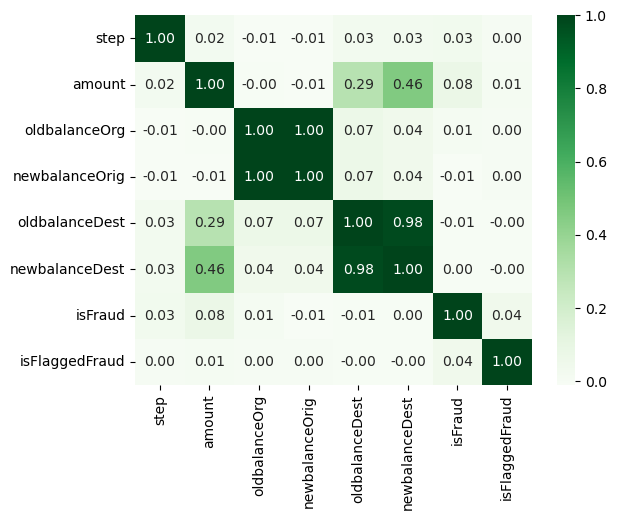

In [17]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Greens')

In [18]:
df.groupby('type')[['oldbalanceDest','newbalanceDest']].get_group('PAYMENT')

,oldbalanceDest,newbalanceDest
0,0.0,0.0
1,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
...,...,...
6362312,0.0,0.0
6362314,0.0,0.0
6362316,0.0,0.0
6362318,0.0,0.0


In [19]:
co=df.groupby('type')[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].get_group('CASH_OUT')

In [20]:
co

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3,181.00,0.0,21182.00,0.00
15,15325.00,0.0,5083.00,51513.44
42,26845.41,0.0,288800.00,2415.16
47,1942.02,0.0,70253.00,64106.18
48,0.00,0.0,652637.00,6453430.91
...,...,...,...,...
6362611,63416.99,0.0,276433.18,339850.17
6362613,1258818.82,0.0,503464.50,1762283.33
6362615,339682.13,0.0,0.00,339682.13
6362617,6311409.28,0.0,68488.84,6379898.11


In [21]:
fr=df.groupby('isFraud')[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].get_group(1)

<Axes: >

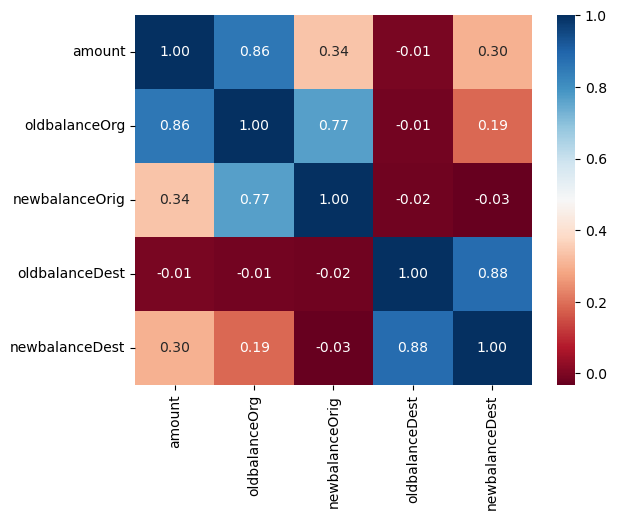

In [22]:
sns.heatmap(fr.corr(),annot=True,fmt='.2f',cmap='RdBu')

- Heat map of Correlation among Features which resulted as Fraud

In [23]:
fr

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,TRANSFER,181.00,181.00,0.0,0.00,0.00
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00
251,TRANSFER,2806.00,2806.00,0.0,0.00,0.00
252,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00
680,TRANSFER,20128.00,20128.00,0.0,0.00,0.00
...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11
6362618,TRANSFER,850002.52,850002.52,0.0,0.00,0.00


In [24]:
ft=df.groupby('isFraud')['type'].get_group(1)

In [25]:
ft.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

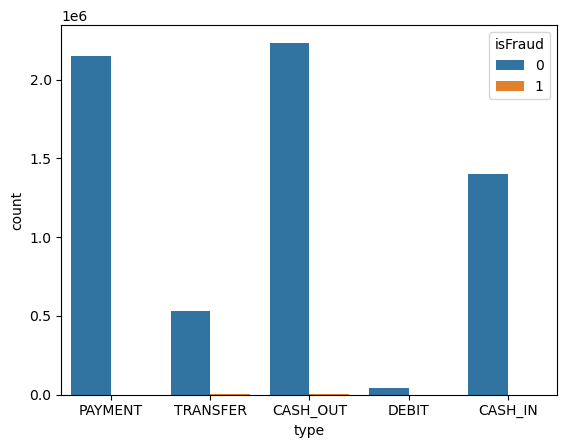

In [26]:
sns.countplot(x='type',data=df,hue='isFraud')

- It is clear that Fraud is detected in the transaction which of type Transfer and Cash out
- In case of Payment, Debi,Cash_in there isn't any fraud detected
- about 4116,4097 is detected as fraus in case of Cash_out and Transfer respectievely
- we have checked each case of type when transaction by PAYMENT type was done also checked Features when Cash_out type was done but it is clear that Transaction detected fraud were not in case of Payment type

#### Independence & Target features

In [27]:
X=df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=df['isFraud']

In [28]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [29]:
X['type']=X['type'].map({'PAYMENT':0,'CASH_OUT':1,'CASH_IN':2,'TRANSFER':3,'DEBIT':4})

In [30]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,9839.64,170136.00,160296.36,0.00,0.00
1,0,1864.28,21249.00,19384.72,0.00,0.00
2,3,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,0,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,3,6311409.28,6311409.28,0.00,0.00,0.00
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,3,850002.52,850002.52,0.00,0.00,0.00


#### Balancing The Target

In [31]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(X))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 6362620
Resampled dataset shape 12708814


## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=.3,random_state=7)

## Model Creation

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.972620582299165


In [37]:
from sklearn.tree import plot_tree

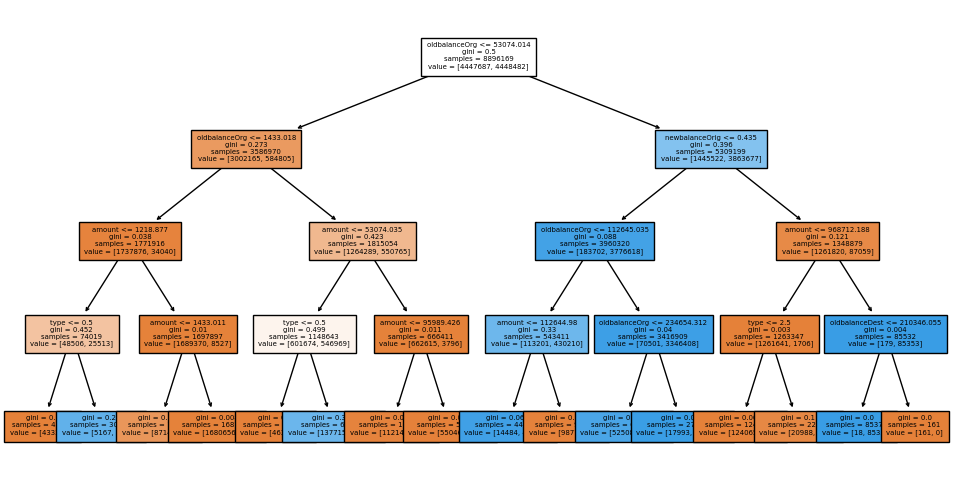

In [49]:
plt.figure(figsize=(12,6))
plot_tree(model,filled=True,fontsize=5,feature_names=['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])
plt.show()

- An accuracy of 97 is resulted by the Decition tree model
- The model predict whether the transaction is fraud or not 
- Especially in case of those transaction made by CASH_OUT and Transfer

In this project, we successfully developed and evaluated machine learning models for predicting fraud in transactional data. By exploring the dataset, identifying key features, and training the model, we were able to achieve promising results in detecting fraudulent transactions. The selected model demonstrated strong performance metrics, indicating its potential for real-world application in fraud detection systems. Moving forward, continuous monitoring and refinement of the model will be essential to ensure its effectiveness in identifying emerging fraud patterns and protecting financial systems from fraudulent activities.